# Complete Training and Evaluation Pipeline

In [20]:
from src.read.processing import Processing
from src.clustering import Birch, CLARA, DBSCAN, FuzzyCMeans, KMeans
from src.evaluation.evaluator import Evaluator
from src.trainflow.TrainFlow import TrainFlow
import numpy as np

## Trainflow Tutorial

Trainflow follows sequentially the following steps:

- **Step 1**: Load the data
- **Step 2**: Preprocess the data
- **Step 3**: Tunes hyperparameters
- **Step 4**: Train the model
- **Step 5**: Evaluate the model
- **Step 6**: Save the model and all the related info

If `hyperparams` argument is set to None (default):

- Hyperparameters are tuned
- The best model is trained

otherwise:

- Provided `hyperparams` are used as training model

**Example**

In [21]:
tf = TrainFlow("glass", 
                Birch.Birch, 
                ["v_measure_score", "silhouette_score"], 
                target="Type")
tf.run();

12:40:24 - src.utils.logger - INFO - Running Birch on glass dataset
12:40:24 - src.utils.logger - INFO - Running Birch on glass dataset
12:40:24 - src.utils.logger - INFO - Running Birch on glass dataset
12:40:24 - src.utils.logger - INFO - Running Birch on glass dataset
INFO:src.utils.logger:Running Birch on glass dataset
12:40:24 - src.utils.logger - INFO - 
Loading data

12:40:24 - src.utils.logger - INFO - 
Loading data

12:40:24 - src.utils.logger - INFO - 
Loading data

12:40:24 - src.utils.logger - INFO - 
Loading data

INFO:src.utils.logger:
Loading data

12:40:24 - src.utils.logger - INFO - Data loaded: glass
12:40:24 - src.utils.logger - INFO - Data loaded: glass
12:40:24 - src.utils.logger - INFO - Data loaded: glass
12:40:24 - src.utils.logger - INFO - Data loaded: glass
INFO:src.utils.logger:Data loaded: glass
12:40:24 - src.utils.logger - INFO - 
Tuning hyperparameters

12:40:24 - src.utils.logger - INFO - 
Tuning hyperparameters

12:40:24 - src.utils.logger - INFO - 
Tun

Info generated

Training params: Parameters used for training the model. In case of hyperparameter tuning, the best model is trained with the best parameters.

In [22]:
tf.training_params

{'threshold': 0.6, 'branching_factor': 90, 'n_clusters': 4}

In [23]:
tf.d_best_params

{'threshold': 0.6, 'branching_factor': 90, 'n_clusters': 4}

Results: Results of the hyperparameters tuning

In [30]:
tf.df_results[tf.df_results["n_out_clusters"] == 6].to_dict("records")[0]

{'threshold': 0.9,
 'branching_factor': 50,
 'n_clusters': 6,
 'n_out_clusters': 6,
 'n_in_classes': 6,
 'homogeneity_score': 0.37275848809183343,
 'completeness_score': 0.6320845802814954,
 'v_measure_score': 0.46895858648517524,
 'silhouette_score': 0.3666709876384292}

Model: Trained model

In [10]:
tf.trained_model

Birch()

In [11]:
from sklearn.metrics import silhouette_score
X = tf.data_loader.df.drop(columns="Type")
y_pred = tf.trained_model.predict(X)
silhouette_score(X, y_pred)

0.569081214712712

In [12]:
tf.evaluator.get_top_k_hyperparams('silhouette_score', 1)

,threshold,branching_factor,n_clusters,n_out_clusters,n_in_classes,homogeneity_score,completeness_score,v_measure_score,silhouette_score
696,0.9,80,2,2,6,0.016371,0.222795,0.030501,0.569081


As we can see above, the trained model scores the same as the best model found during the hyperparameter tuning.

**Specified Hyperparameters**

In [17]:
tf.df_results

,threshold,branching_factor,n_clusters,n_out_clusters,n_in_classes,homogeneity_score,completeness_score,v_measure_score,silhouette_score
696,0.9,80,2,2,6,0.016371,0.222795,0.030501,0.569081
640,0.9,10,2,2,6,0.016371,0.222795,0.030501,0.569081
720,1.0,10,2,2,6,0.016371,0.222795,0.030501,0.569081
568,0.8,20,2,2,6,0.016371,0.222795,0.030501,0.569081
688,0.9,70,2,2,6,0.016371,0.222795,0.030501,0.569081
...,...,...,...,...,...,...,...,...,...
514,0.7,50,4,4,6,0.232214,0.329830,0.272545,0.257801
571,0.8,20,5,5,6,0.274986,0.303222,0.288415,0.256299
588,0.8,40,6,6,6,0.282250,0.372350,0.321099,0.252807
587,0.8,40,5,5,6,0.282250,0.376196,0.322521,0.251924


In [18]:
tf.df_results.columns

Index(['threshold', 'branching_factor', 'n_clusters', 'n_out_clusters',
       'n_in_classes', 'homogeneity_score', 'completeness_score',
       'v_measure_score', 'silhouette_score'],
      dtype='object')

In [31]:
tf.df_results[(tf.df_results["threshold"].between(0.700000, 0.79))&
              (tf.df_results["branching_factor"] == 50)&
              (tf.df_results["n_clusters"] == 4)]

,threshold,branching_factor,n_clusters,n_out_clusters,n_in_classes,homogeneity_score,completeness_score,v_measure_score,silhouette_score
514,0.7,50,4,4,6,0.232214,0.32983,0.272545,0.257801


In [31]:
d_hyperparams = {'threshold': 0.9,
                        'branching_factor': 50,
                        'n_clusters': 6
                }
tf = TrainFlow("glass", Birch.Birch, ["silhouette_score"], hyperparams=d_hyperparams, target="Type")
tf.run();

12:44:28 - src.utils.logger - INFO - Running Birch on glass dataset
12:44:28 - src.utils.logger - INFO - Running Birch on glass dataset
12:44:28 - src.utils.logger - INFO - Running Birch on glass dataset
12:44:28 - src.utils.logger - INFO - Running Birch on glass dataset
12:44:28 - src.utils.logger - INFO - Running Birch on glass dataset
INFO:src.utils.logger:Running Birch on glass dataset
12:44:28 - src.utils.logger - INFO - 
Loading data

12:44:28 - src.utils.logger - INFO - 
Loading data

12:44:28 - src.utils.logger - INFO - 
Loading data

12:44:28 - src.utils.logger - INFO - 
Loading data

12:44:28 - src.utils.logger - INFO - 
Loading data

INFO:src.utils.logger:
Loading data

12:44:28 - src.utils.logger - INFO - Data loaded: glass
12:44:28 - src.utils.logger - INFO - Data loaded: glass
12:44:28 - src.utils.logger - INFO - Data loaded: glass
12:44:28 - src.utils.logger - INFO - Data loaded: glass
12:44:28 - src.utils.logger - INFO - Data loaded: glass
INFO:src.utils.logger:Data loa

In [32]:
from sklearn.metrics import silhouette_score
X = tf.data_loader.df.drop(columns="Type")
y_pred = tf.trained_model.predict(X)
silhouette_score(X, y_pred)

0.3666709876384292

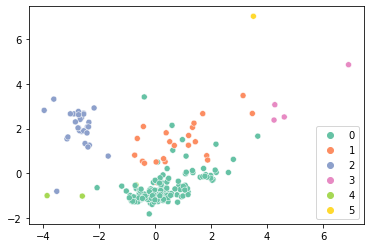

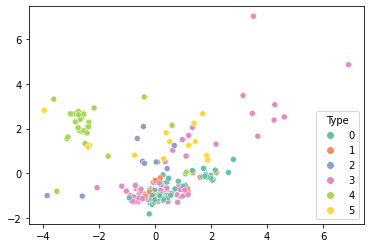

In [40]:
# Scatter plot of the 2 first principal components

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X = tf.data_loader.df.drop(columns="Type")
y = tf.trained_model.predict(X)
X = pca.fit_transform(X)

y_true = tf.data_loader.df["Type"]
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="Set2")
plt.show()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_true, palette="Set2")
plt.show()

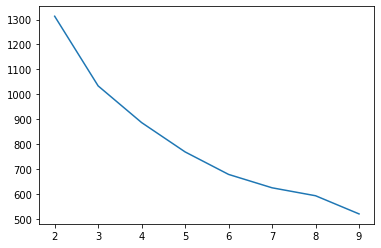

In [42]:
from sklearn.cluster import KMeans

X = tf.data_loader.df.drop(columns="Type")
ls_clusters = np.arange(2, 10)

ls_inertia = []
for n in ls_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    ls_inertia.append(kmeans.inertia_)

plt.plot(ls_clusters, ls_inertia)
plt.show()